In [2]:
import pandas as pd
import numpy as np
pd.reset_option('all')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_colwidth', 5000)
from pprint import pprint

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (15,12)

In [3]:
# skip row 1 so pandas can parse the data properly.
loans = pd.read_csv('lending_club_loans.csv', low_memory=False) 
half_count = len(loans) / 2
loans = loans.dropna(thresh=half_count,axis=1) # Drop any column with more than 50% missing values
loans = loans.drop(['url'],axis=1)      # Don't need these columns.


In [4]:
print(loans.shape)
loans.head()

(10639, 108)


,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,...,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,settlement_term;
0,68407277,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,leadman,10+ years,MORTGAGE,55000.0,Not Verified,Dec-2015,Fully Paid,n,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,Mar-2019,564.0,560.0,0.0,1.0,...,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N,;
1,68355089,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,Engineer,10+ years,MORTGAGE,65000.0,Not Verified,Dec-2015,Fully Paid,n,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,Mar-2019,699.0,695.0,0.0,1.0,...,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N,;
2,68341763,20000.0,20000.0,20000.0,60 months,10.78,432.66,B,B4,truck driver,10+ years,MORTGAGE,63000.0,Not Verified,Dec-2015,Fully Paid,n,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,695.0,699.0,0.0,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,Mar-2019,704.0,700.0,0.0,1.0,...,19.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N,;
3,66310712,35000.0,35000.0,35000.0,60 months,14.85,829.90,C,C5,Information Systems Officer,10+ years,MORTGAGE,110000.0,Source Verified,Dec-2015,Current,n,debt_consolidation,Debt consolidation,076xx,NJ,17.06,0.0,Sep-2008,785.0,789.0,0.0,NaN,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,0.0,0.0,0.0,Feb-2019,829.90,Mar-2019,679.0,675.0,0.0,1.0,...,23.0,12609.0,70.0,1.0,1.0,6987.0,45.0,67300.0,0.0,1.0,0.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,NaN,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,Cash,N,;
4,68476807,10400.0,10400.0,10400.0,60 months,22.45,289.91,F,F1,Contract Specialist,3 years,MORTGAGE,104433.0,Source Verified,Dec-2015,Fully Paid,n,major_purchase,Major purchase,

In [5]:
data_dictionary = pd.read_csv('LCDataDictionary.csv')
print(data_dictionary.shape[0])
data_dictionary.columns.tolist()

118


['LoanStatNew', 'Description']

In [6]:
data_dictionary.head(11)

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.
5,annual_inc_joint,The combined self-reported annual income provided by the co-borrowers during registration
6,application_type,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


In [7]:
drop_list = ['id','funded_amnt','funded_amnt_inv','grade','sub_grade','emp_title','issue_d']
loans = loans.drop(drop_list,axis=1)
loans.head(2)

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,...,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,settlement_term;
0,3600.0,36 months,13.99,123.03,10+ years,MORTGAGE,55000.0,Not Verified,Fully Paid,n,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,Mar-2019,564.0,560.0,0.0,1.0,Individual,0.0,722.0,144904.0,2.0,2.0,0.0,...,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N,;
1,24700.0,36 months,11.99,820.28,10+ years,MORTGAGE,65000.0,Not Verified,Fully Paid,n,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,Mar-2019,699.0,695.0,0.0,1.0,Individual,0.0,0.0,204396.0,1.0,1.0,0.0,...,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N,;


In [8]:
drop_cols = ['out_prncp','out_prncp_inv',
             'total_pymnt','total_pymnt_inv',
             'total_rec_prncp', 'fico_range_low',
             'total_rec_int','total_rec_late_fee',
             'recoveries','collection_recovery_fee',
             'last_pymnt_d','last_pymnt_amnt', 'settlement_term;', 'initial_list_status', 'application_type']
loans = loans.drop(drop_cols, axis=1)
loans.head(2)

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,3600.0,36 months,13.99,123.03,10+ years,MORTGAGE,55000.0,Not Verified,Fully Paid,n,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,679.0,1.0,30.0,7.0,0.0,2765.0,29.7,13.0,Mar-2019,564.0,560.0,0.0,1.0,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,24700.0,36 months,11.99,820.28,10+ years,MORTGAGE,65000.0,Not Verified,Fully Paid,n,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,719.0,4.0,6.0,22.0,0.0,21470.0,19.2,38.0,Mar-2019,699.0,695.0,0.0,1.0,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N


In [9]:
data_dictionary = data_dictionary.rename(columns={'LoanStatNew': 'name'})

loans_dtypes = pd.DataFrame(loans.dtypes,columns=['dtypes'])
loans_dtypes = loans_dtypes.reset_index()
loans_dtypes['name'] = loans_dtypes['index']
loans_dtypes = loans_dtypes[['name','dtypes']]

# the column, first_value, contains values of first row in loans
loans_dtypes['first value'] = loans.loc[0].values
# We are creating an left outer join on loans_dtypes, and placing it on name
preview = loans_dtypes.merge(data_dictionary, on='name',how='left')

In [10]:
preview.head()

,name,dtypes,first value,Description
0,loan_amnt,float64,3600.0,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
1,term,object,36 months,The number of payments on the loan. Values are in months and can be either 36 or 60.
2,int_rate,float64,13.99,Interest Rate on the loan
3,installment,float64,123.03,The monthly payment owed by the borrower if the loan originates.
4,emp_length,object,10+ years,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.


In [11]:
preview[:26]

,name,dtypes,first value,Description
0,loan_amnt,float64,3600.0,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
1,term,object,36 months,The number of payments on the loan. Values are in months and can be either 36 or 60.
2,int_rate,float64,13.99,Interest Rate on the loan
3,installment,float64,123.03,The monthly payment owed by the borrower if the loan originates.
4,emp_length,object,10+ years,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
5,home_ownership,object,MORTGAGE,"The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER."
6,annual_inc,float64,55000.0,The self-reported annual income provided by the borrower during registration.
7,verification_status,object,Not Verified,"Indicates if income was verified by LC, not verified, or if the income source was verified"
8,loan_status,object,Fully Paid,Current status of the loan
9,pymnt_plan,object,n,Indicates if a payment plan has been put in place for the loan


In [12]:
# Let's see number of columns we now have:
loans.shape[1]

86

In [13]:
loans.loan_status.value_counts()

loan_status
Fully Paid            7565
Charged Off           1807
Current               1080
Late (31-120 days)      61
In Grace Period         14
Late (16-30 days)        4
Name: count, dtype: int64

In [14]:
mapping_dict = {'loan_status':{'Fully Paid':1,'Charged Off': 0,'Late (31-120 days)': 0, 'Late (16-30 days)':0}}
loans = loans.replace(mapping_dict)
loans = loans[(loans['loan_status'] == 1) | (loans['loan_status'] == 0)]

loans.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,3600.0,36 months,13.99,123.03,10+ years,MORTGAGE,55000.0,Not Verified,1,n,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,679.0,1.0,30.0,7.0,0.0,2765.0,29.7,13.0,Mar-2019,564.0,560.0,0.0,1.0,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N
1,24700.0,36 months,11.99,820.28,10+ years,MORTGAGE,65000.0,Not Verified,1,n,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,719.0,4.0,6.0,22.0,0.0,21470.0,19.2,38.0,Mar-2019,699.0,695.0,0.0,1.0,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N
2,20000.0,60 months,10.78,432.66,10+ years,MORTGAGE,63000.0,Not Verified,1,n,home_improvement,NaN,605xx,IL,10.78,0.0,Aug-2000,699.0,0.0,NaN,6.0,0.0,7869.0,56.2,18.0,Mar-2019,704.0,700.0,0.0,1.0,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,Cash,N
4,10400.0,60 months,22.45,289.91,3 years,MORTGAGE,104433.0,Source Verified,1,n,major_purchase,Major purchase,174xx,PA,25.37,1.0,Jun-1998,699.0,3.0,12.0,12.0,0.0,21929.0,64.5,35.0,Mar-2018,704.0,700.0,0.0,1.0,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0,N,Cash,N
5,11950.0,36 months,13.44,405.18,4 years,RENT,34000.0,Source Verified,1,n,debt_consolidation,Debt consolidation,300xx,GA,10.20,0.0,Oct-1987,694.0,0.0,NaN,5.0,0.0,8822.0,68.4,6.0,May-2017,759.0,755.0,0.0,1.0,0.0,0.0,12798.0,0.0,1.0,0.0,0.0,338.0,3976.0,99.0,0.0,0.0,4522.0,76.0,12900.0,0.0,0.0,0.0,0.0,2560.0,844.0,91.0,0.0,0.0,338.0,54.0,32.0,32.0,0.0,36.0,NaN,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0,N,Cash,N


In [15]:
drop_columns = []

for col in loans.columns:
    non_null = loans[col].dropna()
    unique_non_null = non_null.unique()
    num_true_unique = len(unique_non_null)
    if num_true_unique < 2:
        drop_columns.append(col)
        
loans = loans.drop(drop_columns, axis=1)
drop_columns

['policy_code', 'disbursement_method']

In [16]:
for col in loans.columns:
    if (len(loans[col].unique()) < 4):
        print(loans[col].value_counts())
        print()

term
 36 months    7403
 60 months    2034
Name: count, dtype: int64

home_ownership
MORTGAGE    4579
RENT        3789
OWN         1069
Name: count, dtype: int64

verification_status
Source Verified    3456
Not Verified       3213
Verified           2768
Name: count, dtype: int64

loan_status
1    7565
0    1872
Name: count, dtype: int64

pymnt_plan
n    9436
y       1
Name: count, dtype: int64

acc_now_delinq
0.0    9393
1.0      43
2.0       1
Name: count, dtype: int64

chargeoff_within_12_mths
0.0    9362
1.0      68
2.0       7
Name: count, dtype: int64

num_tl_120dpd_2m
0.0    8914
1.0       3
Name: count, dtype: int64

num_tl_30dpd
0.0    9409
1.0      27
2.0       1
Name: count, dtype: int64

hardship_flag
N    9435
Y       2
Name: count, dtype: int64

debt_settlement_flag
N    9149
Y     288
Name: count, dtype: int64



In [17]:
print(loans.shape[1])
loans = loans.drop(['pymnt_plan', 'hardship_flag', 'debt_settlement_flag'], axis=1)
loans.shape[1]

84


81

In [18]:
loans.isnull().sum()

loan_amnt                       0
term                            0
int_rate                        0
installment                     0
emp_length                    531
                             ... 
tax_liens                       0
tot_hi_cred_lim                 0
total_bal_ex_mort               0
total_bc_limit                  0
total_il_high_credit_limit      0
Length: 81, dtype: int64

In [19]:
print(loans.dtypes)
loans.head(2)

loan_amnt                     float64
term                           object
int_rate                      float64
installment                   float64
emp_length                     object
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 81, dtype: object


,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,3600.0,36 months,13.99,123.03,10+ years,MORTGAGE,55000.0,Not Verified,1,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,679.0,1.0,30.0,7.0,0.0,2765.0,29.7,13.0,Mar-2019,564.0,560.0,0.0,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0
1,24700.0,36 months,11.99,820.28,10+ years,MORTGAGE,65000.0,Not Verified,1,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,719.0,4.0,6.0,22.0,0.0,21470.0,19.2,38.0,Mar-2019,699.0,695.0,0.0,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0


In [20]:
object_columns_df = loans.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

term                            36 months
emp_length                      10+ years
home_ownership                   MORTGAGE
verification_status          Not Verified
loan_status                             1
purpose                debt_consolidation
title                  Debt consolidation
zip_code                            190xx
addr_state                             PA
earliest_cr_line                 Aug-2003
last_credit_pull_d               Mar-2019
Name: 0, dtype: object


In [21]:
cols = ['home_ownership','verification_status','emp_length','term','addr_state']

for col in cols:
    print(loans[col].value_counts())
    print()

home_ownership
MORTGAGE    4579
RENT        3789
OWN         1069
Name: count, dtype: int64

verification_status
Source Verified    3456
Not Verified       3213
Verified           2768
Name: count, dtype: int64

emp_length
10+ years    3106
< 1 year      901
2 years       820
3 years       793
1 year        619
5 years       594
4 years       551
8 years       471
6 years       400
9 years       332
7 years       319
Name: count, dtype: int64

term
 36 months    7403
 60 months    2034
Name: count, dtype: int64

addr_state
CA    1392
NY     761
TX     759
FL     684
IL     339
NJ     330
GA     324
VA     288
OH     287
PA     272
NC     257
MI     254
MD     248
MA     246
AZ     220
WA     211
CO     199
MN     164
TN     162
MO     160
CT     150
IN     142
NV     135
AL     125
LA     119
OR     117
WI     108
SC     100
KY      92
OK      79
AR      76
KS      76
HI      52
MS      52
UT      51
NM      48
NH      43
RI      41
WV      39
ME      37
NE      31
MT      26
DE      2

In [22]:
for name in ['purpose','title']:
    print(loans[name].value_counts())
    print()

purpose
debt_consolidation    5351
credit_card           2316
other                  553
home_improvement       534
major_purchase         203
medical                108
car                     99
small_business          95
vacation                70
moving                  59
house                   45
renewable_energy         4
Name: count, dtype: int64

title
Debt consolidation         5294
Credit card refinancing    2292
Other                       539
Home improvement            520
Major purchase              203
Medical expenses            105
Car financing                97
Business                     93
Vacation                     70
Moving and relocation        58
Home buying                  45
Green loan                    4
Name: count, dtype: int64



In [23]:
mapping_dict = {
    'emp_length':{
        '10+ years': 10,
        '9 years': 9,
        '8 years': 8,
        '7 years': 7,
        '6 years': 6,
        '5 years': 5,
        '4 years': 4,
        '3 years': 3,
        '2 years': 2,
        '1 year': 1,
        '< 1 year': 0,
        'n/a': 0
    }
}

loans = loans.drop(['last_credit_pull_d','addr_state','title','earliest_cr_line'], axis=1)
    
loans = loans.replace(mapping_dict)
loans.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,dti,delinq_2yrs,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,3600.0,36 months,13.99,123.03,10.0,MORTGAGE,55000.0,Not Verified,1,debt_consolidation,190xx,5.91,0.0,679.0,1.0,30.0,7.0,0.0,2765.0,29.7,13.0,564.0,560.0,0.0,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0
1,24700.0,36 months,11.99,820.28,10.0,MORTGAGE,65000.0,Not Verified,1,small_business,577xx,16.06,1.0,719.0,4.0,6.0,22.0,0.0,21470.0,19.2,38.0,699.0,695.0,0.0,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0
2,20000.0,60 months,10.78,432.66,10.0,MORTGAGE,63000.0,Not Verified,1,home_improvement,605xx,10.78,0.0,699.0,0.0,NaN,6.0,0.0,7869.0,56.2,18.0,704.0,700.0,0.0,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0
4,10400.0,60 months,22.45,289.91,3.0,MORTGAGE,104433.0,Source Verified,1,major_purchase,174xx,25.37,1.0,699.0,3.0,12.0,12.0,0.0,21929.0,64.5,35.0,704.0,700.0,0.0,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0
5,11950.0,36 months,13.44,405.18,4.0,RENT,34000.0,Source Verified,1,debt_consolidation,300xx,10.20,0.0,694.0,0.0,NaN,5.0,0.0,8822.0,68.4,6.0,759.0,755.0,0.0,0.0,0.0,12798.0,0.0,1.0,0.0,0.0,338.0,3976.0,99.0,0.0,0.0,4522.0,76.0,12900.0,0.0,0.0,0.0,0.0,2560.0,844.0,91.0,0.0,0.0,338.0,54.0,32.0,32.0,0.0,36.0,NaN,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0


In [24]:
cat_columns = ['home_ownership','verification_status','purpose','term']
dummy_df = pd.get_dummies(loans[cat_columns])
loans_= pd.concat([loans, dummy_df], axis=1)
loans = loans.drop(cat_columns, axis=1)
loans.head()

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,zip_code,dti,delinq_2yrs,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,3600.0,13.99,123.03,10.0,55000.0,1,190xx,5.91,0.0,679.0,1.0,30.0,7.0,0.0,2765.0,29.7,13.0,564.0,560.0,0.0,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0
1,24700.0,11.99,820.28,10.0,65000.0,1,577xx,16.06,1.0,719.0,4.0,6.0,22.0,0.0,21470.0,19.2,38.0,699.0,695.0,0.0,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0
2,20000.0,10.78,432.66,10.0,63000.0,1,605xx,10.78,0.0,699.0,0.0,NaN,6.0,0.0,7869.0,56.2,18.0,704.0,700.0,0.0,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0
4,10400.0,22.45,289.91,3.0,104433.0,1,174xx,25.37,1.0,699.0,3.0,12.0,12.0,0.0,21929.0,64.5,35.0,704.0,700.0,0.0,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0
5,11950.0,13.44,405.18,4.0,34000.0,1,300xx,10.20,0.0,694.0,0.0,NaN,5.0,0.0,8822.0,68.4,6.0,759.0,755.0,0.0,0.0,0.0,12798.0,0.0,1.0,0.0,0.0,338.0,3976.0,99.0,0.0,0.0,4522.0,76.0,12900.0,0.0,0.0,0.0,0.0,2560.0,844.0,91.0,0.0,0.0,338.0,54.0,32.0,32.0,0.0,36.0,NaN,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0


In [25]:
loans['zip_code'].unique()

array(['190xx', '577xx', '605xx', '174xx', '300xx', '550xx', '293xx',
       '160xx', '029xx', '275xx', '916xx', '299xx', '226xx', '856xx',
       '462xx', '219xx', '297xx', '100xx', '214xx', '750xx', '672xx',
       '125xx', '880xx', '238xx', '114xx', '993xx', '212xx', '215xx',
       '441xx', '710xx', '606xx', '331xx', '802xx', '984xx', '761xx',
       '142xx', '493xx', '330xx', '644xx', '471xx', '200xx', '015xx',
       '453xx', '019xx', '347xx', '546xx', '351xx', '852xx', '210xx',
       '134xx', '112xx', '440xx', '430xx', '967xx', '054xx', '958xx',
       '220xx', '350xx', '472xx', '085xx', '197xx', '117xx', '774xx',
       '787xx', '447xx', '752xx', '434xx', '670xx', '016xx', '236xx',
       '850xx', '482xx', '070xx', '030xx', '023xx', '280xx', '436xx',
       '604xx', '346xx', '660xx', '681xx', '661xx', '439xx', '431xx',
       '973xx', '477xx', '377xx', '349xx', '282xx', '986xx', '910xx',
       '544xx', '136xx', '355xx', '207xx', '448xx', '913xx', '551xx',
       '498xx', '010

In [26]:
loans['zip_code'] = loans['zip_code'].str.rstrip('x')
loans['zip_code'].head()

0    190
1    577
2    605
4    174
5    300
Name: zip_code, dtype: object

In [27]:
# loans.to_csv('loans_2007.csv', index=False)

In [28]:
filtered_loans = pd.read_csv('loans_2007.csv',low_memory=False)
filtered_loans.head(6)

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,zip_code,dti,delinq_2yrs,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,3600.0,13.99,123.03,10.0,55000.0,1,190,5.91,0.0,679.0,1.0,30.0,7.0,0.0,2765.0,29.7,13.0,564.0,560.0,0.0,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0
1,24700.0,11.99,820.28,10.0,65000.0,1,577,16.06,1.0,719.0,4.0,6.0,22.0,0.0,21470.0,19.2,38.0,699.0,695.0,0.0,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0
2,20000.0,10.78,432.66,10.0,63000.0,1,605,10.78,0.0,699.0,0.0,NaN,6.0,0.0,7869.0,56.2,18.0,704.0,700.0,0.0,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0
3,10400.0,22.45,289.91,3.0,104433.0,1,174,25.37,1.0,699.0,3.0,12.0,12.0,0.0,21929.0,64.5,35.0,704.0,700.0,0.0,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0
4,11950.0,13.44,405.18,4.0,34000.0,1,300,10.20,0.0,694.0,0.0,NaN,5.0,0.0,8822.0,68.4,6.0,759.0,755.0,0.0,0.0,0.0,12798.0,0.0,1.0,0.0,0.0,338.0,3976.0,99.0,0.0,0.0,4522.0,76.0,12900.0,0.0,0.0,0.0,0.0,2560.0,844.0,91.0,0.0,0.0,338.0,54.0,32.0,32.0,0.0,36.0,NaN,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0
5,20000.0,9.17,637.58,10.0,180000.0,1,550,14.67,0.0,684.0,0.0,49.0,12.0,0.0,87329.0,84.5,27.0,654.0,650.0,0.0,0.0,0.0,360358.0,0.0,2.0,0.0,2.0,18.0,29433.0,63.0,2.0,3.0,13048.0,74.0,94200.0,1.0,0.0,1.0,6.0,30030.0,0.0,102.9,0.0,0.0,142.0,306.0,10.0,10.0,4.0,12.0,10.0,0.0,4.0,6.0,4.0,5.0,7.0,9.0,16.0,6.0,12.0,0.0,0.0,0.0,2.0,96.3,100.0,0.0,0.0,388852.0,116762.0,31500.0,46452.0


In [29]:
def zip_formatted(row):
    if len(str(row)) == 1:
        row = str(row)+ '00'
    elif len(str(row)) == 2:
        row = str(row)+ '0'
    return int(row)

In [30]:
filtered_loans['zip_code'] = filtered_loans['zip_code'].apply(zip_formatted)

In [31]:
filtered_loans['zip_code'].unique()

array([190, 577, 605, 174, 300, 550, 293, 160, 290, 275, 916, 299, 226,
       856, 462, 219, 297, 100, 214, 750, 672, 125, 880, 238, 114, 993,
       212, 215, 441, 710, 606, 331, 802, 984, 761, 142, 493, 330, 644,
       471, 200, 150, 453, 347, 546, 351, 852, 210, 134, 112, 440, 430,
       967, 540, 958, 220, 350, 472, 850, 197, 117, 774, 787, 447, 752,
       434, 670, 236, 482, 700, 230, 280, 436, 604, 346, 660, 681, 661,
       439, 431, 973, 477, 377, 349, 282, 986, 910, 544, 136, 355, 207,
       448, 913, 551, 498, 640, 481, 357, 211, 334, 327, 111, 926, 480,
       805, 138, 930, 770, 725, 711, 172, 322, 751, 206, 113, 234, 894,
       146, 250, 800, 310, 208, 594, 945, 380, 301, 941, 370, 191, 922,
       906, 104, 158, 900, 294, 957, 490, 468, 820, 563, 786, 463, 917,
       607, 164, 980, 956, 231, 324, 554, 600, 341, 704, 366, 940, 815,
       825, 495, 928, 140, 270, 778, 302, 488, 618, 376, 743, 939, 763,
       303, 201, 222, 483, 240, 365, 296, 312, 116, 890, 891, 76

In [32]:
filtered_loans.isnull().sum()

loan_amnt                       0
int_rate                        0
installment                     0
emp_length                    531
annual_inc                      0
                             ... 
tax_liens                       0
tot_hi_cred_lim                 0
total_bal_ex_mort               0
total_bc_limit                  0
total_il_high_credit_limit      0
Length: 73, dtype: int64

In [33]:
# skip row 1 so pandas can parse the data properly.
loans = pd.read_csv('lending_club_loans.csv', low_memory=False) 
half_count = len(loans) / 2
loans = loans.dropna(thresh=half_count,axis=1) # Drop any column with more than 50% missing values
loans = loans.drop(['url'],axis=1)      # Don't need these columns.


In [34]:
data_dictionary = pd.read_csv('LCDataDictionary.csv')
print(data_dictionary.shape[0])
data_dictionary.columns.tolist()

118


['LoanStatNew', 'Description']

In [35]:
drop_list = ['id','funded_amnt','funded_amnt_inv','grade','sub_grade','emp_title','issue_d']
loans = loans.drop(drop_list,axis=1)
loans.head(2)

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,...,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,settlement_term;
0,3600.0,36 months,13.99,123.03,10+ years,MORTGAGE,55000.0,Not Verified,Fully Paid,n,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,Mar-2019,564.0,560.0,0.0,1.0,Individual,0.0,722.0,144904.0,2.0,2.0,0.0,...,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,Cash,N,;
1,24700.0,36 months,11.99,820.28,10+ years,MORTGAGE,65000.0,Not Verified,Fully Paid,n,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,Mar-2019,699.0,695.0,0.0,1.0,Individual,0.0,0.0,204396.0,1.0,1.0,0.0,...,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,Cash,N,;


In [36]:
data_dictionary = data_dictionary.rename(columns={'LoanStatNew': 'name'})

loans_dtypes = pd.DataFrame(loans.dtypes,columns=['dtypes'])
loans_dtypes = loans_dtypes.reset_index()
loans_dtypes['name'] = loans_dtypes['index']
loans_dtypes = loans_dtypes[['name','dtypes']]

# the column, first_value, contains values of first row in loans
loans_dtypes['first value'] = loans.loc[0].values
# We are creating an left outer join on loans_dtypes, and placing it on name
preview = loans_dtypes.merge(data_dictionary, on='name',how='left')

In [37]:
preview[:26]

,name,dtypes,first value,Description
0,loan_amnt,float64,3600.0,"The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value."
1,term,object,36 months,The number of payments on the loan. Values are in months and can be either 36 or 60.
2,int_rate,float64,13.99,Interest Rate on the loan
3,installment,float64,123.03,The monthly payment owed by the borrower if the loan originates.
4,emp_length,object,10+ years,Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
5,home_ownership,object,MORTGAGE,"The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER."
6,annual_inc,float64,55000.0,The self-reported annual income provided by the borrower during registration.
7,verification_status,object,Not Verified,"Indicates if income was verified by LC, not verified, or if the income source was verified"
8,loan_status,object,Fully Paid,Current status of the loan
9,pymnt_plan,object,n,Indicates if a payment plan has been put in place for the loan


In [38]:
loans.loan_status.value_counts()

loan_status
Fully Paid            7565
Charged Off           1807
Current               1080
Late (31-120 days)      61
In Grace Period         14
Late (16-30 days)        4
Name: count, dtype: int64

In [39]:
drop_columns = []

for col in loans.columns:
    non_null = loans[col].dropna()
    unique_non_null = non_null.unique()
    num_true_unique = len(unique_non_null)
    if num_true_unique < 2:
        drop_columns.append(col)
        
loans = loans.drop(drop_columns, axis=1)
drop_columns

['policy_code', 'disbursement_method']

In [40]:
print(loans.shape[1])
loans = loans.drop('pymnt_plan', axis=1)
loans.shape[1]

99


98

In [41]:
print(loans.dtypes)
loans.head(2)

loan_amnt                     float64
term                           object
int_rate                      float64
installment                   float64
emp_length                     object
                               ...   
total_bc_limit                float64
total_il_high_credit_limit    float64
hardship_flag                  object
debt_settlement_flag           object
settlement_term;               object
Length: 98, dtype: object


,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,settlement_term;
0,3600.0,36 months,13.99,123.03,10+ years,MORTGAGE,55000.0,Not Verified,Fully Paid,debt_consolidation,Debt consolidation,190xx,PA,5.91,0.0,Aug-2003,675.0,679.0,1.0,30.0,7.0,0.0,2765.0,29.7,13.0,w,0.0,0.0,4421.723917,4421.72,3600.0,821.72,0.0,0.0,0.0,Jan-2019,122.67,Mar-2019,564.0,560.0,0.0,Individual,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,N,;
1,24700.0,36 months,11.99,820.28,10+ years,MORTGAGE,65000.0,Not Verified,Fully Paid,small_business,Business,577xx,SD,16.06,1.0,Dec-1999,715.0,719.0,4.0,6.0,22.0,0.0,21470.0,19.2,38.0,w,0.0,0.0,25679.660000,25679.66,24700.0,979.66,0.0,0.0,0.0,Jun-2016,926.35,Mar-2019,699.0,695.0,0.0,Individual,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,N,;


In [42]:
cols = ['home_ownership','verification_status','emp_length','term','addr_state']

for col in cols:
    print(loans[col].value_counts())
    print()

home_ownership
MORTGAGE    5173
RENT        4172
OWN         1186
Name: count, dtype: int64

verification_status
Source Verified    3804
Not Verified       3696
Verified           3031
Name: count, dtype: int64

emp_length
10+ years    3514
< 1 year      993
2 years       912
3 years       872
1 year        689
5 years       663
4 years       598
8 years       537
6 years       439
9 years       381
7 years       354
Name: count, dtype: int64

term
 36 months    7418
 60 months    3113
Name: count, dtype: int64

addr_state
CA    1495
TX     872
NY     849
FL     751
IL     377
NJ     372
GA     367
VA     334
OH     324
PA     317
NC     290
MI     283
MA     274
MD     274
AZ     240
WA     238
CO     223
TN     184
MO     182
MN     176
CT     171
IN     162
NV     144
AL     138
LA     135
OR     127
WI     124
SC     119
KY     102
OK      93
KS      91
AR      85
UT      58
HI      58
MS      53
NM      53
NH      46
ME      46
WV      44
RI      41
NE      35
MT      29
DE      2

In [43]:
mapping_dict = {
    'emp_length':{
        '10+ years': 10,
        '9 years': 9,
        '8 years': 8,
        '7 years': 7,
        '6 years': 6,
        '5 years': 5,
        '4 years': 4,
        '3 years': 3,
        '2 years': 2,
        '1 year': 1,
        '< 1 year': 0,
        'n/a': 0
    }
}

loans = loans.drop(['last_credit_pull_d','addr_state','title','earliest_cr_line'], axis=1)
    
loans = loans.replace(mapping_dict)
loans.head()

,loan_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,zip_code,dti,delinq_2yrs,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,debt_settlement_flag,settlement_term;
0,3600.0,36 months,13.99,123.03,10.0,MORTGAGE,55000.0,Not Verified,Fully Paid,debt_consolidation,190xx,5.91,0.0,675.0,679.0,1.0,30.0,7.0,0.0,2765.0,29.7,13.0,w,0.00,0.00,4421.723917,4421.72,3600.00,821.72,0.0,0.0,0.0,Jan-2019,122.67,564.0,560.0,0.0,Individual,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0,N,N,;
1,24700.0,36 months,11.99,820.28,10.0,MORTGAGE,65000.0,Not Verified,Fully Paid,small_business,577xx,16.06,1.0,715.0,719.0,4.0,6.0,22.0,0.0,21470.0,19.2,38.0,w,0.00,0.00,25679.660000,25679.66,24700.00,979.66,0.0,0.0,0.0,Jun-2016,926.35,699.0,695.0,0.0,Individual,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0,N,N,;
2,20000.0,60 months,10.78,432.66,10.0,MORTGAGE,63000.0,Not Verified,Fully Paid,home_improvement,605xx,10.78,0.0,695.0,699.0,0.0,NaN,6.0,0.0,7869.0,56.2,18.0,w,0.00,0.00,22705.924294,22705.92,20000.00,2705.92,0.0,0.0,0.0,Jun-2017,15813.30,704.0,700.0,0.0,Joint App,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0,N,N,;
3,35000.0,60 months,14.85,829.90,10.0,MORTGAGE,110000.0,Source Verified,Current,debt_consolidation,076xx,17.06,0.0,785.0,789.0,0.0,NaN,13.0,0.0,7802.0,11.6,17.0,w,15897.65,15897.65,31464.010000,31464.01,19102.35,12361.66,0.0,0.0,0.0,Feb-2019,829.90,679.0,675.0,0.0,Individual,0.0,0.0,301500.0,1.0,1.0,0.0,1.0,23.0,12609.0,70.0,1.0,1.0,6987.0,45.0,67300.0,0.0,1.0,0.0,2.0,23192.0,54962.0,12.1,0.0,0.0,36.0,87.0,2.0,2.0,1.0,2.0,NaN,0.0,4.0,5.0,8.0,10.0,2.0,10.0,13.0,5.0,13.0,0.0,0.0,0.0,1.0,100.0,0.0,0.0,0.0,381215.0,52226.0,62500.0,18000.0,N,N,;
4,10400.0,60 months,22.45,289.91,3.0,MORTGAGE,104433.0,Source Verified,Fully Paid,major_purchase,174xx,25.37,1.0,695.0,699.0,3.0,12.0,12.0,0.0,21929.0,64.5,35.0,w,0.00,0.00,11740.500000,11740.50,10400.00,1340.50,0.0,0.0,0.0,Jul-2016,10128.96,704.0,700.0,0.0,Individual,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.

In [44]:
loans['zip_code'].unique()

array(['190xx', '577xx', '605xx', '076xx', '174xx', '300xx', '550xx',
       '293xx', '160xx', '029xx', '290xx', '786xx', '275xx', '916xx',
       '299xx', '226xx', '856xx', '117xx', '462xx', '219xx', '297xx',
       '100xx', '214xx', '750xx', '672xx', '125xx', '880xx', '238xx', nan,
       '114xx', '993xx', '212xx', '636xx', '215xx', '441xx', '710xx',
       '606xx', '331xx', '802xx', '945xx', '984xx', '761xx', '142xx',
       '493xx', '430xx', '330xx', '231xx', '707xx', '644xx', '376xx',
       '471xx', '200xx', '015xx', '453xx', '019xx', '347xx', '546xx',
       '351xx', '852xx', '936xx', '210xx', '322xx', '134xx', '112xx',
       '440xx', '460xx', '967xx', '054xx', '128xx', '958xx', '220xx',
       '350xx', '472xx', '085xx', '197xx', '774xx', '787xx', '447xx',
       '752xx', '434xx', '670xx', '016xx', '236xx', '850xx', '482xx',
       '070xx', '030xx', '023xx', '280xx', '436xx', '432xx', '604xx',
       '346xx', '660xx', '681xx', '661xx', '439xx', '431xx', '064xx',
       '973xx',

In [45]:
filtered_loans = pd.read_csv('loans_2007.csv',low_memory=False)
filtered_loans.head(6)

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,zip_code,dti,delinq_2yrs,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,3600.0,13.99,123.03,10.0,55000.0,1,190,5.91,0.0,679.0,1.0,30.0,7.0,0.0,2765.0,29.7,13.0,564.0,560.0,0.0,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0
1,24700.0,11.99,820.28,10.0,65000.0,1,577,16.06,1.0,719.0,4.0,6.0,22.0,0.0,21470.0,19.2,38.0,699.0,695.0,0.0,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0
2,20000.0,10.78,432.66,10.0,63000.0,1,605,10.78,0.0,699.0,0.0,NaN,6.0,0.0,7869.0,56.2,18.0,704.0,700.0,0.0,0.0,0.0,189699.0,0.0,1.0,0.0,4.0,19.0,10827.0,73.0,0.0,2.0,2081.0,65.0,14000.0,2.0,5.0,1.0,6.0,31617.0,2737.0,55.9,0.0,0.0,125.0,184.0,14.0,14.0,5.0,101.0,10.0,0.0,2.0,3.0,2.0,4.0,6.0,4.0,7.0,3.0,6.0,0.0,0.0,0.0,0.0,100.0,50.0,0.0,0.0,218418.0,18696.0,6200.0,14877.0
3,10400.0,22.45,289.91,3.0,104433.0,1,174,25.37,1.0,699.0,3.0,12.0,12.0,0.0,21929.0,64.5,35.0,704.0,700.0,0.0,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0
4,11950.0,13.44,405.18,4.0,34000.0,1,300,10.20,0.0,694.0,0.0,NaN,5.0,0.0,8822.0,68.4,6.0,759.0,755.0,0.0,0.0,0.0,12798.0,0.0,1.0,0.0,0.0,338.0,3976.0,99.0,0.0,0.0,4522.0,76.0,12900.0,0.0,0.0,0.0,0.0,2560.0,844.0,91.0,0.0,0.0,338.0,54.0,32.0,32.0,0.0,36.0,NaN,0.0,2.0,3.0,2.0,2.0,2.0,4.0,4.0,3.0,5.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,16900.0,12798.0,9400.0,4000.0
5,20000.0,9.17,637.58,10.0,180000.0,1,550,14.67,0.0,684.0,0.0,49.0,12.0,0.0,87329.0,84.5,27.0,654.0,650.0,0.0,0.0,0.0,360358.0,0.0,2.0,0.0,2.0,18.0,29433.0,63.0,2.0,3.0,13048.0,74.0,94200.0,1.0,0.0,1.0,6.0,30030.0,0.0,102.9,0.0,0.0,142.0,306.0,10.0,10.0,4.0,12.0,10.0,0.0,4.0,6.0,4.0,5.0,7.0,9.0,16.0,6.0,12.0,0.0,0.0,0.0,2.0,96.3,100.0,0.0,0.0,388852.0,116762.0,31500.0,46452.0


In [46]:
filtered_loans['zip_code'] = filtered_loans['zip_code'].apply(zip_formatted)

In [47]:
filtered_loans.isnull().sum()

loan_amnt                       0
int_rate                        0
installment                     0
emp_length                    531
annual_inc                      0
                             ... 
tax_liens                       0
tot_hi_cred_lim                 0
total_bal_ex_mort               0
total_bc_limit                  0
total_il_high_credit_limit      0
Length: 73, dtype: int64

In [48]:
filtered_loans = filtered_loans.dropna()
print(filtered_loans.dtypes.value_counts())
print()
filtered_loans.isnull().sum()

float64    71
int64       2
Name: count, dtype: int64



loan_amnt                     0
int_rate                      0
installment                   0
emp_length                    0
annual_inc                    0
                             ..
tax_liens                     0
tot_hi_cred_lim               0
total_bal_ex_mort             0
total_bc_limit                0
total_il_high_credit_limit    0
Length: 73, dtype: int64

In [49]:
# filtered_loans.to_csv('filtered_loans.csv',index=False)

In [50]:
new_loans = pd.read_csv('filtered_loans.csv',low_memory=False)
new_loans.head()

,loan_amnt,int_rate,installment,emp_length,annual_inc,loan_status,zip_code,dti,delinq_2yrs,fico_range_high,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,3600.0,13.99,123.03,10.0,55000.0,1,190,5.91,0.0,679.0,1.0,30.0,7.0,0.0,2765.0,29.7,13.0,564.0,560.0,0.0,0.0,722.0,144904.0,2.0,2.0,0.0,1.0,21.0,4981.0,36.0,3.0,3.0,722.0,34.0,9300.0,3.0,1.0,4.0,4.0,20701.0,1506.0,37.2,0.0,0.0,148.0,128.0,3.0,3.0,1.0,4.0,4.0,2.0,2.0,4.0,2.0,5.0,3.0,4.0,9.0,4.0,7.0,0.0,0.0,0.0,3.0,76.9,0.0,0.0,0.0,178050.0,7746.0,2400.0,13734.0
1,24700.0,11.99,820.28,10.0,65000.0,1,577,16.06,1.0,719.0,4.0,6.0,22.0,0.0,21470.0,19.2,38.0,699.0,695.0,0.0,0.0,0.0,204396.0,1.0,1.0,0.0,1.0,19.0,18005.0,73.0,2.0,3.0,6472.0,29.0,111800.0,0.0,0.0,6.0,4.0,9733.0,57830.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,0.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,314017.0,39475.0,79300.0,24667.0
2,10400.0,22.45,289.91,3.0,104433.0,1,174,25.37,1.0,699.0,3.0,12.0,12.0,0.0,21929.0,64.5,35.0,704.0,700.0,0.0,0.0,0.0,331730.0,1.0,3.0,0.0,3.0,14.0,73839.0,84.0,4.0,7.0,9702.0,78.0,34000.0,2.0,1.0,3.0,10.0,27644.0,4567.0,77.5,0.0,0.0,128.0,210.0,4.0,4.0,6.0,4.0,1.0,0.0,4.0,6.0,5.0,9.0,10.0,7.0,19.0,6.0,12.0,0.0,0.0,0.0,4.0,96.6,60.0,0.0,0.0,439570.0,95768.0,20300.0,88097.0
3,20000.0,9.17,637.58,10.0,180000.0,1,550,14.67,0.0,684.0,0.0,49.0,12.0,0.0,87329.0,84.5,27.0,654.0,650.0,0.0,0.0,0.0,360358.0,0.0,2.0,0.0,2.0,18.0,29433.0,63.0,2.0,3.0,13048.0,74.0,94200.0,1.0,0.0,1.0,6.0,30030.0,0.0,102.9,0.0,0.0,142.0,306.0,10.0,10.0,4.0,12.0,10.0,0.0,4.0,6.0,4.0,5.0,7.0,9.0,16.0,6.0,12.0,0.0,0.0,0.0,2.0,96.3,100.0,0.0,0.0,388852.0,116762.0,31500.0,46452.0
4,20000.0,8.49,631.26,10.0,85000.0,1,293,17.61,1.0,709.0,0.0,3.0,8.0,0.0,826.0,5.7,15.0,674.0,670.0,0.0,0.0,0.0,141601.0,0.0,3.0,0.0,4.0,13.0,27111.0,75.0,0.0,0.0,640.0,55.0,14500.0,1.0,0.0,2.0,4.0,17700.0,13674.0,5.7,0.0,0.0,149.0,55.0,32.0,13.0,3.0,32.0,8.0,1.0,2.0,2.0,3.0,3.0,9.0,3.0,3.0,2.0,8.0,0.0,0.0,1.0,0.0,93.3,0.0,0.0,0.0,193390.0,27937.0,14500.0,36144.0


In [51]:
new_loans['zip_code'].unique()

array([190, 577, 174, 550, 293, 290, 297, 750, 672, 993, 215, 331, 984,
       142, 493, 330, 441, 200, 150, 210, 112, 430, 197, 774, 447, 752,
       850, 482, 700, 300, 604, 661, 958, 377, 910, 207, 462, 481, 334,
       725, 230, 440, 894, 250, 301, 770, 922, 906, 551, 370, 468, 800,
       786, 607, 980, 956, 231, 324, 751, 967, 917, 852, 140, 270, 926,
       488, 191, 939, 945, 222, 940, 483, 138, 357, 760, 302, 806, 610,
       453, 181, 329, 308, 953, 325, 463, 707, 217, 631, 358, 347, 130,
       451, 351, 287, 973, 601, 925, 968, 283, 211, 131, 201, 890, 660,
       372, 460, 919, 420, 637, 286, 681, 450, 152, 276, 376, 531, 935,
       580, 388, 972, 113, 431, 117, 208, 605, 280, 646, 116, 608, 393,
       902, 246, 982, 294, 606, 943, 295, 985, 913, 223, 339, 710, 907,
       640, 193, 402, 494, 120, 111, 153, 275, 282, 570, 328, 974, 123,
       323, 553, 381, 691, 557, 240, 349, 104, 337, 537, 454, 178, 950,
       394, 316, 641, 720, 244, 554, 761, 880, 378, 100, 326, 41

In [52]:
new_loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 73 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   loan_amnt                   999 non-null    float64
 1   int_rate                    999 non-null    float64
 2   installment                 999 non-null    float64
 3   emp_length                  999 non-null    float64
 4   annual_inc                  999 non-null    float64
 5   loan_status                 999 non-null    int64  
 6   zip_code                    999 non-null    int64  
 7   dti                         999 non-null    float64
 8   delinq_2yrs                 999 non-null    float64
 9   fico_range_high             999 non-null    float64
 10  inq_last_6mths              999 non-null    float64
 11  mths_since_last_delinq      999 non-null    float64
 12  open_acc                    999 non-null    float64
 13  pub_rec                     999 non

In [53]:
#total loan counts / total columns
# new_loans.shape = [rows=32002, columns=41]
new_loans['loan_status'].value_counts() / new_loans.shape[0]


loan_status
1    0.806807
0    0.193193
Name: count, dtype: float64

In [54]:
def compute_metrics(predictions):
    
    predictions = pd.Series(predictions)
    # False positives
    fp_filter = (predictions == 1) & (new_loans['loan_status'] == 0)
    fp = len(predictions[fp_filter])
    
    # True positives
    tp_filter = (predictions == 1) & (new_loans['loan_status'] == 1)
    tp = len(predictions[tp_filter])
    
    # False negatives
    fn_filter = (predictions == 0) & (new_loans['loan_status'] == 1)
    fn = len(predictions[fn_filter])
    
    # True negatives
    tn_filter = (predictions == 0)& (new_loans['loan_status'] == 0)
    tn = len(predictions[tn_filter])
    
    # Rates
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    
    print(tpr * 100)
    print(fpr * 100)
    print()
    
    print('Other Mesurements:')
    
    
    sp = tn / (tn + fp)
    sty = tp / (tp + fn)
    G_mean = np.sqrt(sp * sty)
    prcn = tp / (tp + fp)
    acc = (tn + tp) / features.shape[0]
    method_dict = {'specificity': '{:.2f}'.format(sp*100), 
               'sensitivity': '{:.2f}'.format(sty*100), 
               'G-mean': '{:.2f}'.format(G_mean*100),
               'precision': '{:.2f}'.format(prcn*100), 
               'accuracy': '{:.2f}'.format(acc*100),
               'False Positive Rate': '{:.2f}'.format(fpr*100)
              }
    return pd.DataFrame(method_dict,index=['values'])

In [55]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection  import cross_val_predict, KFold

scaler = StandardScaler()

In [56]:
x_cols = new_loans.columns
features_cols = x_cols.drop(['loan_status','last_fico_range_high','zip_code']) # Dropping last_fico_range_high field
features = new_loans[features_cols]
features_scaled = scaler.fit_transform(features)
target = new_loans['loan_status']

In [57]:
lr = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=4000)
kf = KFold(features_scaled.shape[0],shuffle=True,random_state=1)

predictions = cross_val_predict(lr,features_scaled,target,cv=kf) 

# Let's compute performance:
metrics = compute_metrics(predictions)
metrics

90.44665012406948
12.953367875647666

Other Mesurements:


,specificity,sensitivity,G-mean,precision,accuracy,False Positive Rate
values,87.05,90.45,88.73,96.68,89.79,12.95


In [58]:
penalty = {
    0: 13,
    1: 1
}

lr = LogisticRegression(class_weight=penalty, max_iter=4000)
kf = KFold(features_scaled.shape[0],shuffle=True,random_state=1)

predictions = cross_val_predict(lr,features_scaled,target,cv=kf) 

# Let's compute performance:
metrics = compute_metrics(predictions)
metrics

86.10421836228288
6.217616580310881

Other Mesurements:


,specificity,sensitivity,G-mean,precision,accuracy,False Positive Rate
values,93.78,86.10,89.86,98.30,87.59,6.22


In [59]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [60]:
penalty = {
    0: 14,
    1: 1
}

pipe = make_pipeline(LogisticRegression(class_weight=penalty, max_iter=4000))
C_range = 10.**np.arange(-2, 3)
penalty_options = ['l2']
param_grid = dict(logisticregression__C=C_range, logisticregression__penalty=penalty_options)
grid = GridSearchCV(pipe, param_grid, cv=10, scoring='roc_auc')
grid.fit(features_scaled, target)
grid.best_score_

0.9552778996101365

In [61]:
grid.best_params_

{'logisticregression__C': 0.1, 'logisticregression__penalty': 'l2'}

In [62]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

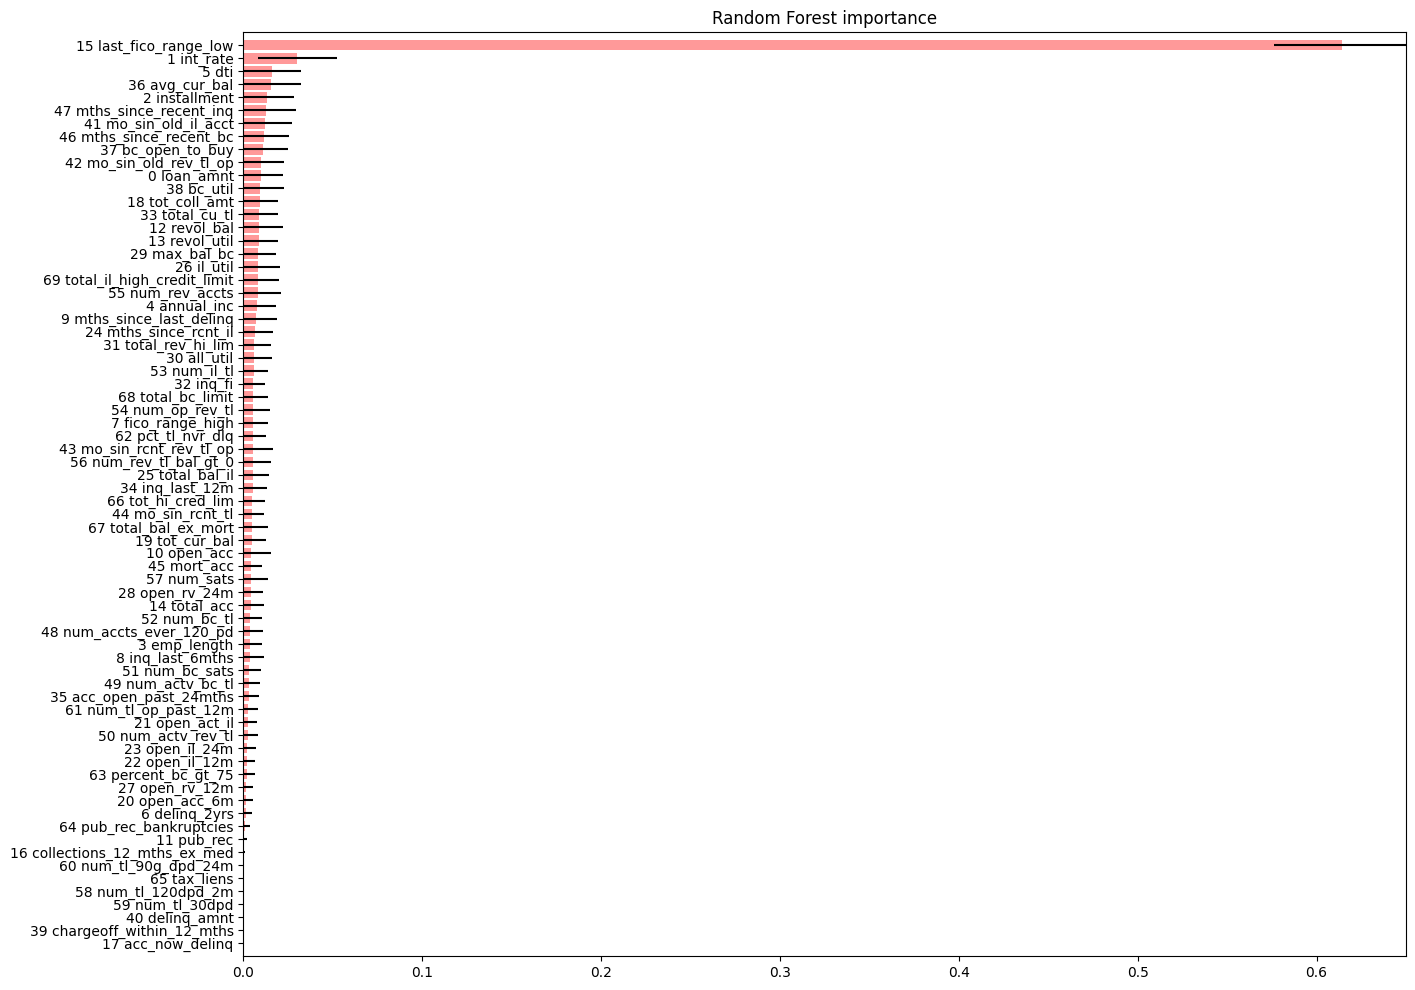

In [63]:
RF = RandomForestRegressor(n_estimators=100, random_state=1).fit(features,target)



feature_names = np.array([' '.join([str(b), a]) for a,b in
zip(features.columns,range(len(features.columns)))])


importance = np.mean([tree.feature_importances_ for tree in RF.estimators_],axis=0)
std = np.std([tree.feature_importances_ for tree in RF.estimators_],axis=0)
indices = np.argsort(importance)
range_ = range(len(importance))
plt.figure()
plt.title("Random Forest importance")

plt.barh(range_,importance[indices], color="r", xerr=std[indices], alpha=0.4, align="center")

plt.yticks(range(len(importance)), feature_names[indices])
plt.ylim([-1, len(importance)])
plt.xlim([0.0, 0.65])
plt.show()

In [75]:
import sklearn
print(sklearn.__version__)

1.2.2


In [69]:

from sklearn.inspection import plot_partial_dependence
from sklearn.ensemble import GradientBoostingRegressor
GBM = GradientBoostingRegressor(n_estimators=100,random_state=1).fit(features, target)
feature = [15,5,12,4,6,13,2,1,14]
fig, axis = plot_partial_dependence(GBM, features, feature,feature_names=feature_names)
# display the plot


<Figure size 1500x1200 with 0 Axes>